In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the display environment for seaborn
sns.set(style="whitegrid")

# Load the cleaned data
file_path = r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\02 Data\Prepared Data\cleaned_citibike.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify
df.head()


trip_id  bike_id weekday  start_hour           start_time  start_station_id  \
0  LnQzQk    16013     Mon          18  2013-09-09 18:18:55               523   
1  IL9boN    15230     Thu          18  2013-09-12 18:38:53               257   
2  46clGB    17942     Wed          19  2013-09-18 19:44:04               479   
3  v7vdFt    19683     Sat          11  2013-09-28 11:54:37               527   
4  HbKJBz    14581     Fri          22  2013-09-27 22:01:01               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

              end_time  end_station_id     end_station_name  \
0  2013-09-09 18:35:28             334      W 20 St & 7 Ave   
1  2013-09-12 18:48:34             236  St Marks Pl & 2 Ave   
2  2013-09-18 19:50:05             513     W 56 St & 10 Ave   
3  2013-09-28 12:03:58             441      E 52 St & 2 Ave   
4  2013-09-27 22:08:08             432    E 7 St & Avenue A   

   end_station_latitude  end_station_longitude  trip_duration  subscriber  \
0             40.742388             -73.997262            993  Subscriber   
1             40.728419             -73.987140            581  Subscriber   
2             40.768254             -73.988639            361  Subscriber   
3             40.756014             -73.967416            561  Subscriber   
4             40.726218             -73.983799            427  Subscriber   

   birth_year  gender  
0      1968.0       2  
1      1983.0       1  
2      1989.0       1  
3      1988.0       2  
4      1986.0       2

### **Step 2: Creating a Correlation Matrix Heatmap**

The next step is to identify the strength and direction of relationships between variables by creating a correlation matrix heatmap. We first need to ensure that only numeric columns are included in the correlation calculation.


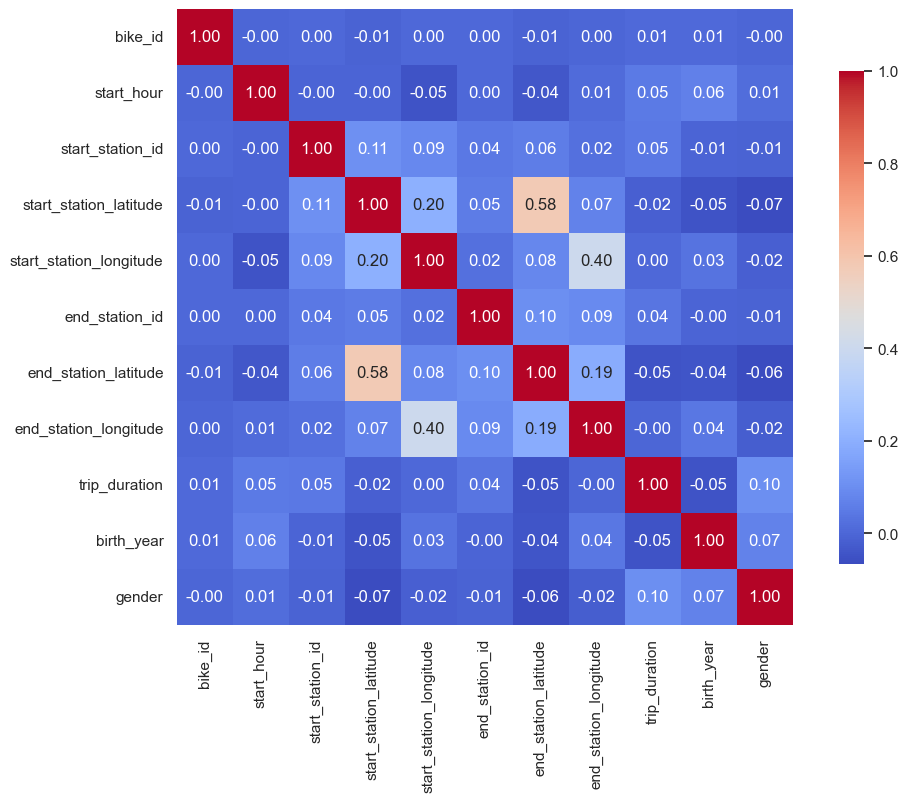

In [17]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Save the heatmap as an image
plt.savefig(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\04 Analysis\Visualisations\correlation_heatmap.png')

# Display the heatmap
plt.show()



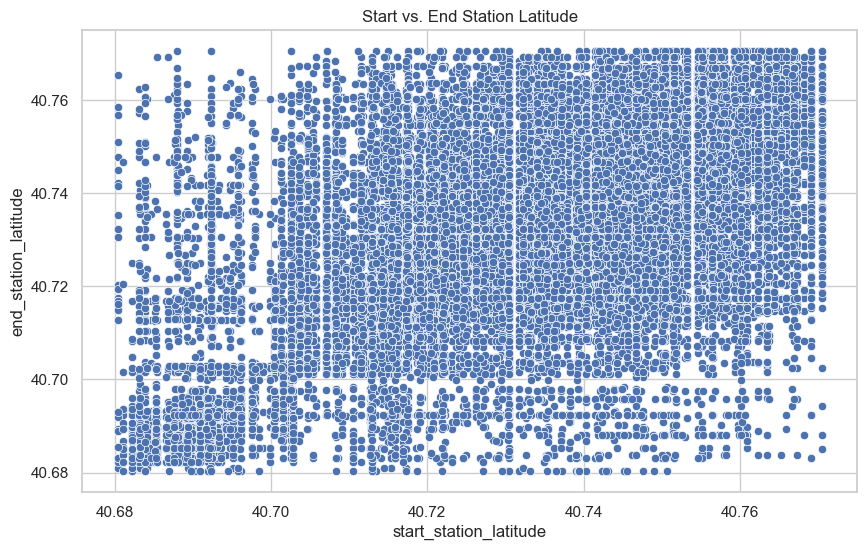

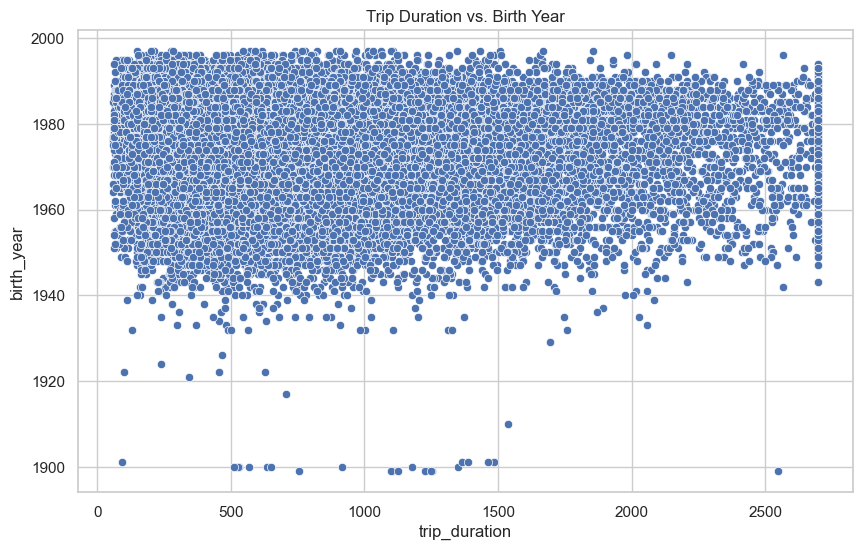

In [19]:
# Scatterplot for variables with a strong positive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_station_latitude', y='end_station_latitude', data=df)
plt.title('Start vs. End Station Latitude')

# Save the scatterplot as an image
plt.savefig(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\04 Analysis\Visualisations\start_vs_end_latitude.png')

plt.show()

# Scatterplot for variables with a strong negative correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='birth_year', data=df)
plt.title('Trip Duration vs. Birth Year')

# Save the scatterplot as an image
plt.savefig(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\04 Analysis\Visualisations\trip_duration_vs_birth_year.png')

plt.show()


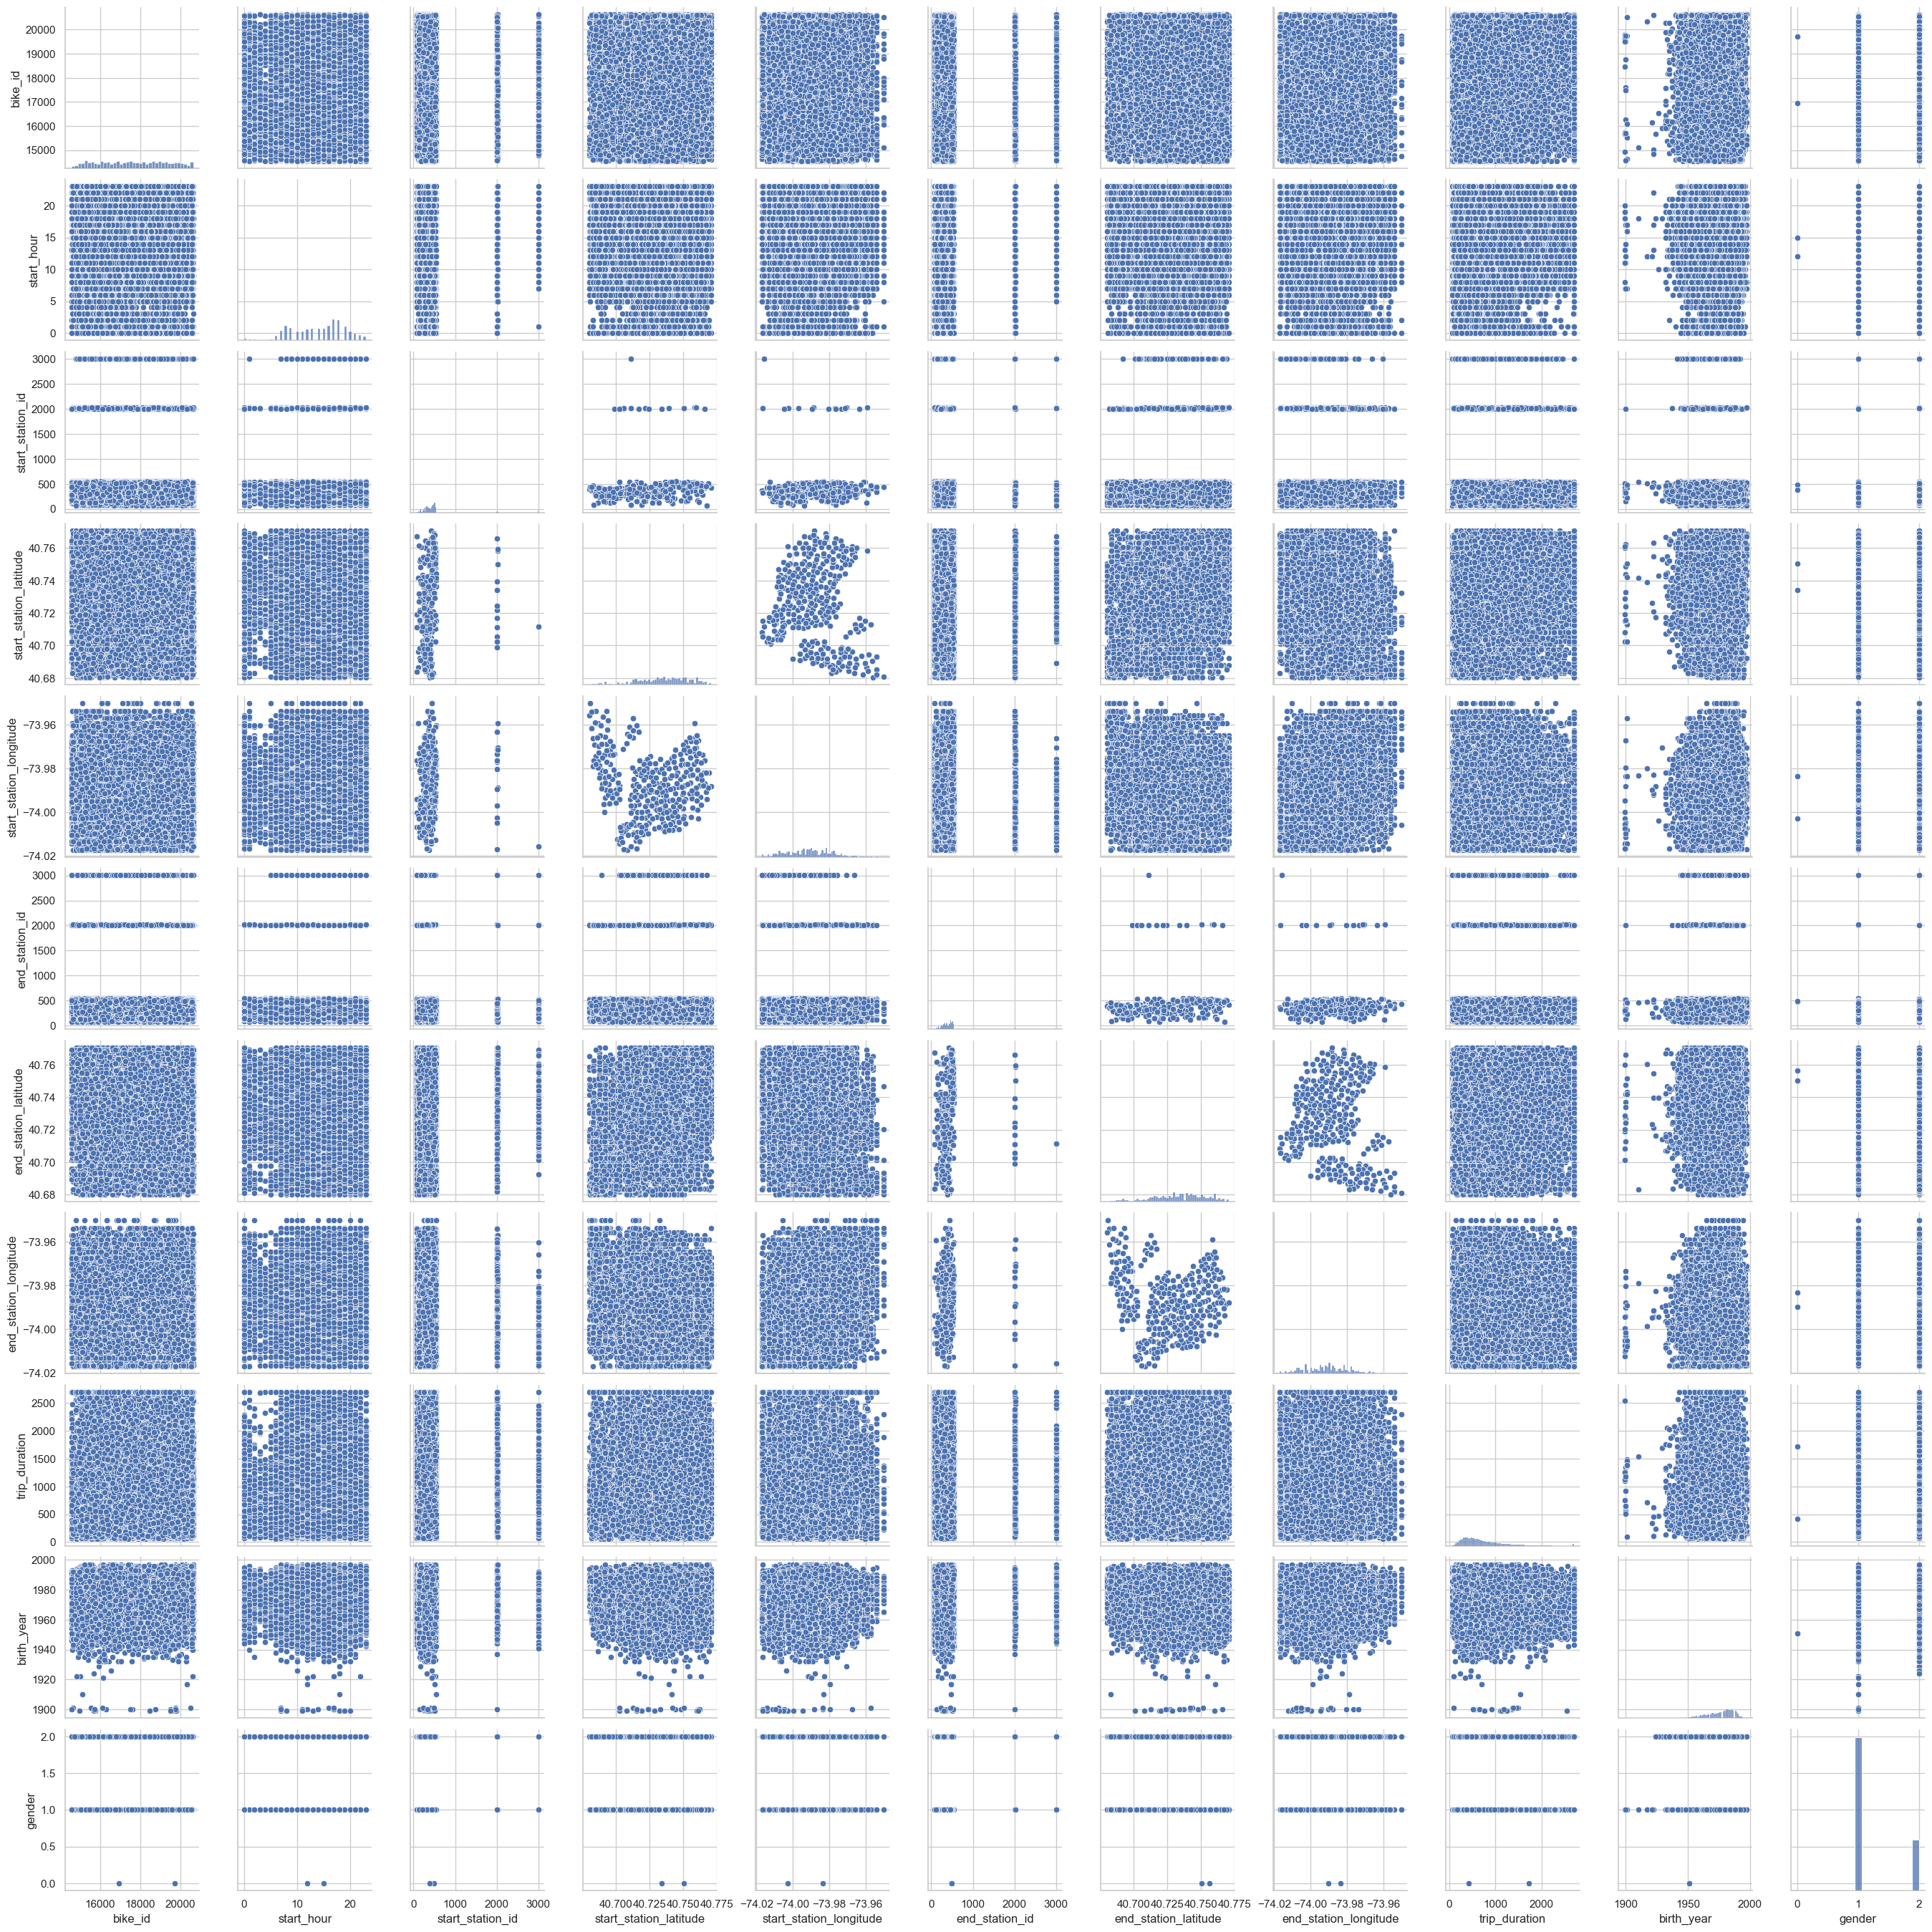

In [23]:
# Pair plot for the entire dataset
pair_plot = sns.pairplot(df)

# Save the pair plot as an image
pair_plot.savefig(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\04 Analysis\Visualisations\pair_plot.png')

plt.show()



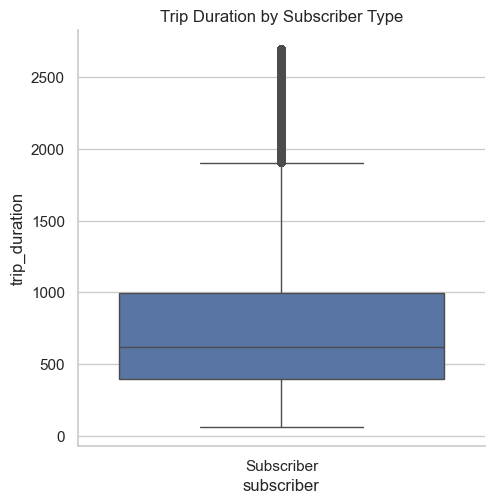

In [25]:
# Create a categorical plot (catplot) to compare the number of trips by user type
sns.catplot(x="subscriber", y="trip_duration", kind="box", data=df)
plt.title('Trip Duration by Subscriber Type')

# Save the categorical plot as an image
plt.savefig(r'C:\Users\sudee\OneDrive\Documents\Newyork Citi Bike Project\04 Analysis\Visualisations\trip_duration_by_subscriber_type.png')

plt.show()



### Create a Correlation Matrix Heatmap (Colored)

We created a correlation matrix heatmap to visualize the relationships between numeric variables in our dataset. The heatmap uses color intensity to represent the strength of the correlations, with values ranging from -1 to 1.

- **Positive Correlation (0 to 1)**: Indicates that as one variable increases, the other also tends to increase.
- **Negative Correlation (-1 to 0)**: Indicates that as one variable increases, the other tends to decrease.
- **No Correlation (0)**: Indicates no linear relationship between the variables.

### Discuss What the Coefficients in the Plot Mean in Terms of the Relationships Between the Variables

The correlation coefficients in the heatmap reveal the linear relationships between the pairs of variables:

- **Start and End Station Latitude (0.58)**: This moderate positive correlation suggests that bikes are generally picked up and dropped off at stations that are geographically close in terms of latitude.
- **Trip Duration and Birth Year (~0)**: The near-zero correlation between `trip_duration` and `birth_year` indicates no significant linear relationship between the length of a bike trip and the rider's age.
- **Start Station Latitude and Longitude (0.20)**: This weak positive correlation shows a slight tendency for stations at higher latitudes to also be at higher longitudes.
- **Bike ID and Other Variables (~0)**: The correlations involving `bike_id` are close to zero, indicating no linear relationship with other variables like trip duration, station locations, or time of day.

These insights suggest that most variables in the dataset have weak linear relationships, indicating that more complex or non-linear relationships might be present.

### Create a Scatterplot (or Plots) for the Variables with the Strongest Correlations and Examine the Nature of Their Relationships

Scatterplots were created for the pairs of variables with the strongest correlations to examine the nature of their relationships:

- **Start vs. End Station Latitude**: The scatterplot shows a moderate positive relationship, where bikes tend to be picked up and dropped off in nearby latitudinal locations.
- **Trip Duration vs. Birth Year**: This scatterplot reveals no clear pattern, indicating that the relationship between trip duration and birth year is weak or non-linear.

### Discuss the Output for a scatter plot

- The scatterplot between `start_station_latitude` and `end_station_latitude` confirms the moderate positive correlation identified in the heatmap. This suggests that riders often travel within a localized area.
- The scatterplot between `trip_duration` and `birth_year` lacks a clear pattern, indicating no simple linear relationship between these variables. This suggests that age may not be a significant factor in determining trip duration, or that the relationship is more complex and requires further exploration.

### Create a Pair Plot of the Entire Data Set

A pair plot was generated to visualize the relationships between all numeric variables in the dataset:

- The pair plot combines scatterplots for each pair of variables with histograms for each individual variable.
- **Distribution Observations**:
  - Many variables exhibit weak or no clear relationships, as evidenced by the scatterplots.
  - The histograms show varying distributions, with some variables like `trip_duration` and `birth_year` being more uniformly distributed, while others have more skewed distributions.

### Comment on the Distribution of the Variables and Mark Variables You’d Like to Explore Further with an Explanation of Why

- **Trip Duration**: The distribution is fairly uniform, but the scatterplots suggest no clear relationship with other variables. Further analysis may involve exploring non-linear relationships or interactions with other variables.
- **Start and End Station Latitude**: The positive correlation suggests that these are geographically dependent variables. Exploring further could involve geographic clustering or mapping.
- **Birth Year**: The uniform distribution with no clear relationship in scatterplots indicates that age might not significantly affect other variables. However, segmenting the data by age groups could provide more insights.

### Create a Categorical Plot and Interpret the Results

A categorical plot (boxplot) was created to examine the relationship between `trip_duration` and `subscriber` type:

- **Boxplot Interpretation**:
  - The boxplot shows that subscribers tend to have shorter and more consistent trip durations compared to non-subscribers, who display a wider range and more outliers.
  - This suggests that subscribers may use the service for more routine, shorter trips, while non-subscribers might use the service less frequently but for longer durations.

These insights can help inform hypotheses about user behavior and guide further analysis, such as exploring the factors influencing trip duration among different user types.


### Revisiting and Answering the Questions from the Previous Task

In the previous task, several questions were generated to guide the exploration of the CitiBike dataset. Below are the answers to those questions based on the visual exploration conducted so far.

#### 1. What are the busiest bike stations in New York City?
   - **Answer**: The correlation heatmap and scatterplots suggest that bike stations that are geographically close (in terms of latitude and longitude) tend to have higher usage. However, the dataset does not directly provide a measure of "busiest stations" in terms of trip count or frequency. This would require a separate analysis to count trips per station.

#### 2. How does bike usage vary by time of day or day of the week?
   - **Answer**: This analysis has not yet been conducted. Further exploration of temporal data (e.g., start times, days of the week) is needed to answer this question. Line plots or bar charts segmented by time variables could provide insights into these patterns.

#### 3. Is there a relationship between trip duration and the distance between start and end stations?
   - **Answer**: The scatterplot between `start_station_latitude` and `end_station_latitude` suggests a moderate positive correlation, indicating that bikes are generally used for shorter trips within a localized area. However, the scatterplot between `trip_duration` and `birth_year` showed no clear linear relationship, suggesting that other factors might influence trip duration. Further analysis is needed to directly measure the distance between start and end stations and its impact on trip duration.

### New Questions Arising from the Exploration

Based on the visual exploration conducted so far, the following new questions have arisen:

1. **Do certain subscriber types tend to have longer or shorter trip durations?**
   - The boxplot indicated that subscribers generally have shorter and more consistent trip durations compared to non-subscribers. It would be interesting to explore the factors that contribute to these differences, such as trip purpose, time of day, or station location.

2. **Are there specific stations that are more frequently used by subscribers versus non-subscribers?**
   - The correlation between geographic coordinates suggests localized usage patterns, but it is unclear if these patterns differ between subscriber types. Mapping usage by station and subscriber type could provide further insights.

3. **What other factors could influence the trip duration, given the lack of a strong linear relationship with variables like birth year?**
   - Since age does not appear to significantly affect trip duration, other factors such as weather conditions, time of day, or purpose of the trip could be explored to determine their impact on trip duration.

### Hypotheses Formed from the Exploration

1. **Hypothesis 1**: Subscribers tend to take shorter trips than non-subscribers, possibly due to more routine or commuter-related usage.
2. **Hypothesis 2**: The latitude and longitude of start and end stations are moderately correlated, suggesting that trips generally occur within localized areas.

These hypotheses can guide further analysis, where more detailed exploration and testing can be conducted to validate or refute them.

